# Machine Learning Zoomcamp

### Homework Module 2

In [1]:
import numpy as np
import pandas as pd
import plotly.io as pio

### Dataset

In [2]:
df = pd.read_csv('housing.csv')

### Exploratory Data Analysis
* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 

In [3]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

longitude
[-122.23 -122.22 -122.24 -122.25 -122.26]
844

latitude
[37.88 37.86 37.85 37.84 37.83]
862

housing_median_age
[41. 21. 52. 42. 50.]
52

total_rooms
[ 880. 7099. 1467. 1274. 1627.]
5926

total_bedrooms
[ 129. 1106.  190.  235.  280.]
1923

population
[ 322. 2401.  496.  558.  565.]
3888

households
[ 126. 1138.  177.  219.  259.]
1815

median_income
[8.3252 8.3014 7.2574 5.6431 3.8462]
12928

median_house_value
[452600. 358500. 352100. 341300. 342200.]
3842

ocean_proximity
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
5



Distribution of median_house_value

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='median_house_value', ylabel='Count'>

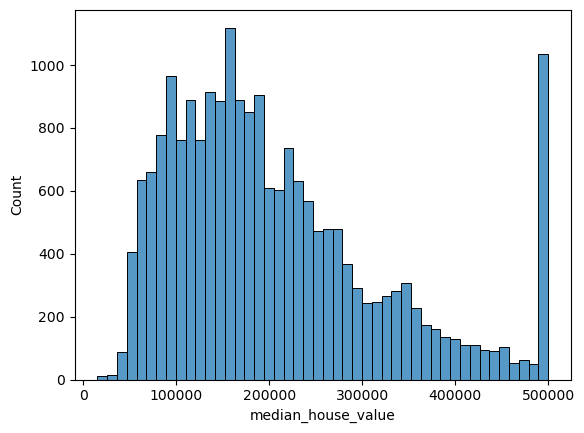

In [5]:
sns.histplot(df.median_house_value)

### Preparing the data

In [6]:
df = df[df['ocean_proximity'].isin(['<1H OCEAN','INLAND'])]

In [7]:
columns = ['latitude', 'longitude', 'housing_median_age',
'total_rooms','total_bedrooms','population',
'households','median_income','median_house_value']

In [8]:
df = df[columns]

### Question 1

There's one feature with missing values. What is it?

* `total_rooms`
* `total_bedrooms`
* `population`
* `households`

In [9]:
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

**Answer:** total_bedrooms

### Question 2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- 1195
- 1295

In [10]:
df.population.median()

1195.0

**Answer:** 1195

### Prepare and split the dataset

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

<Axes: xlabel='median_house_value', ylabel='Count'>

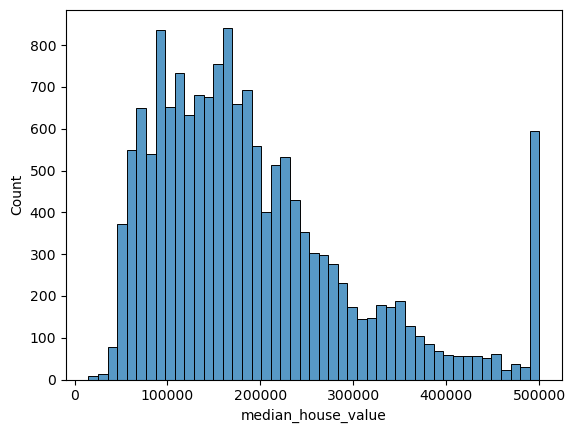

In [11]:
sns.histplot(df.median_house_value)

<Axes: xlabel='median_house_value', ylabel='Count'>

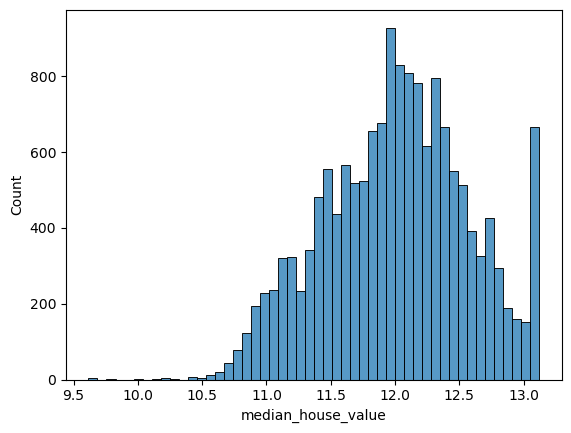

In [12]:
median_logs = np.log1p(df.median_house_value)
sns.histplot(median_logs, bins=50)

In [13]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [14]:
n_val, n_test, n_train

(3137, 3137, 9413)

In [15]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [16]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train : n_train + n_val]]
df_test = df.iloc[ idx[n_train + n_val :]]

In [17]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
1,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
2,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
3,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
4,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [20]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [21]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [22]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

**Option 1. Filling NAs with 0**

In [23]:
X_train_0 = df_train.fillna(0).values

In [24]:
w0, w = train_linear_regression(X_train_0, y_train)

y_pred = w0 + X_train_0.dot(w)

In [25]:
w0

-9.763249477929213

In [26]:
w

array([-2.68233309e-01, -2.55938802e-01,  1.77710730e-03, -3.38393956e-05,
        2.93766352e-04, -1.52190447e-04,  3.96908643e-04,  1.80600946e-01])

<Axes: ylabel='Count'>

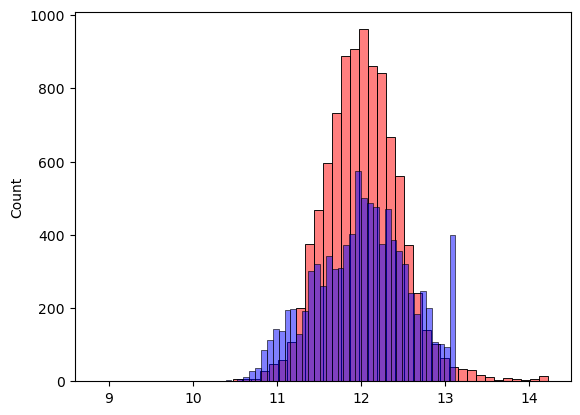

In [27]:
sns.histplot(y_pred, color = 'red', bins = 50, alpha = 0.5)
sns.histplot(y_train, color = 'blue', bins = 50, alpha = 0.5)

In [28]:
round(rmse(y_train, y_pred),2)

0.34

**Option 2. Fill with the mean**

In [29]:
X_train_mean = df_train.fillna(df_train.total_bedrooms.mean()).values


In [30]:
w0, w = train_linear_regression(X_train_mean, y_train)

y_pred = w0 + X_train_mean.dot(w)

In [31]:
w0

-9.886133215861097

In [32]:
w

array([-2.68652914e-01, -2.57026361e-01,  1.79880767e-03, -3.87631029e-05,
        3.78806885e-04, -1.49641599e-04,  3.25344392e-04,  1.81951358e-01])

<Axes: ylabel='Count'>

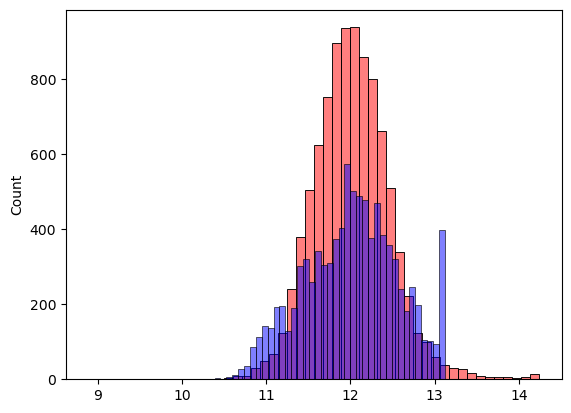

In [33]:
sns.histplot(y_pred, color = 'red', bins = 50, alpha = 0.5)
sns.histplot(y_train, color = 'blue', bins = 50, alpha = 0.5)

In [34]:
round(rmse(y_train, y_pred),2)

0.34

**Answer:** Both are equally good

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.000001
- 0.001
- 0.0001

In [35]:
X_train = X_train_0

In [36]:
def train_linear_regression_reg(X, y, r = 0.001):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [37]:
list = []
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    X_val = df_val
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    list.append(score)
    
print(min(list))
print(list.index(min(list)))

0.3400286008526852
0


**Answer:** 0

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- 0.005
- 0.0005

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [38]:
type(y_pred)
y_train.shape

(9413,)

In [39]:
idx = np.arange(n)
score_list = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train : n_train + n_val]]
    df_test = df.iloc[ idx[n_train + n_val :]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_train_0 = df_train.fillna(0).values
    
    w0, w = train_linear_regression(X_train_0, y_train)
    
    X_val = df_val
    
    y_pred = w0 + X_val.dot(w)
    
    value = rmse(y_val, y_pred)
    
    score_list.append(value)


score_list = np.array(score_list)
std = np.std(score_list)
print(round(std,3))



0.006


**Answer:** 0.005

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- 0.33
- 0.43

In [40]:
np.random.seed(seed)
np.random.shuffle(idx)
    
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train : n_train + n_val]]
df_test = df.iloc[ idx[n_train + n_val :]]
   
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
   
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
   
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']
    
X_train_0 = df_train.fillna(0).values
X_val = df_val
y_pred = w0 + X_val.dot(w)
w0, w = train_linear_regression_reg(X_train_0, y_train,0.001)
rmse(y_val, y_pred)

0.33146688870437646

**Answer:** 0.33